In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pylab as pl
import csv # csv module
import warnings #for disable purpose
import seaborn as sns #library for making statistical graphics
import os # for current directory
import glob
from sklearn.tree import DecisionTreeClassifier #For predict decision trees
from sklearn.model_selection import train_test_split, GridSearchCV #Split data
from sklearn.ensemble import RandomForestClassifier#Random forests
from sklearn import datasets #Random forests
from sklearn.cluster import KMeans #Library for clusters
from sklearn.preprocessing import MinMaxScaler#Used in clusters
from scipy import stats#for correlation
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')
from io import StringIO
import io
from pathlib import Path


In [5]:
pd.options.display.max_rows = 9999999999
#////////////////////////////////////////////////////////Import Dataset/////////////////////////////////////////////////////////////
base_dir = Path.home()
manipulated_data_directory = base_dir / "NaMinhaRua" / "Ficheiros de dados Manipulados"
ipmadataset = pd.read_csv(manipulated_data_directory / 'combined_ipma_data.csv')
ipmadataset = pd.DataFrame(ipmadataset)
print ("\nMissing values :  ", ipmadataset.isnull().sum().values.sum())


Missing values :   76025


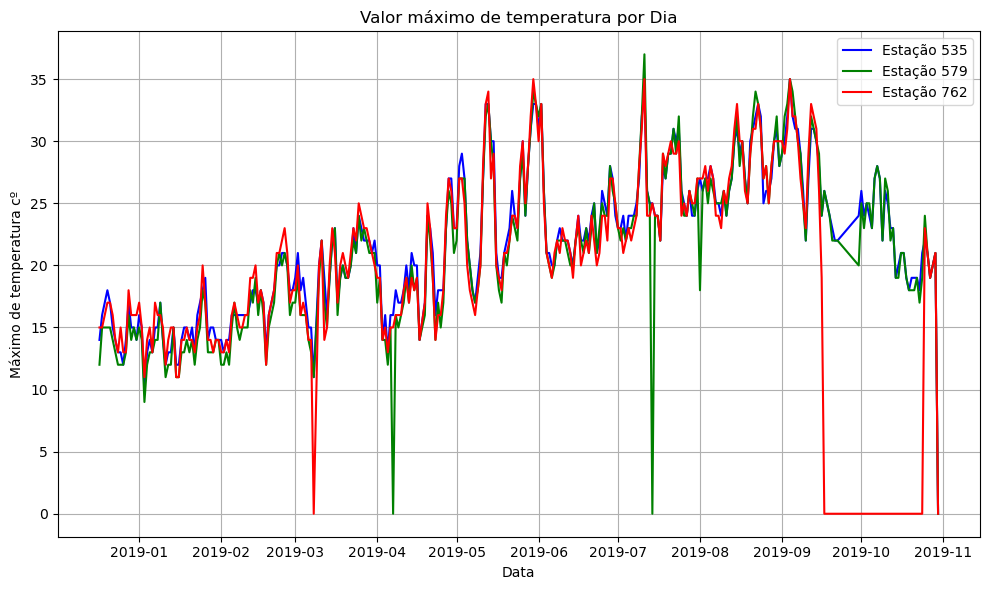

O dia que atingiu a temperatura máxima na estação 535 foi: 2019-09-04 35.0
O dia que atingiu a temperatura máxima na estação 579 foi: 2019-07-11 37.0
O dia que atingiu a temperatura máxima na estação 762 foi: 2019-05-30 35.0


In [6]:
# Maximum "temperature" values until 2020

# Mapping 'estacion'
df_estacao_535 = ipmadataset[ipmadataset['estacion'] == 535]
df_estacao_579 = ipmadataset[ipmadataset['estacion'] == 579]
df_estacao_762 = ipmadataset[ipmadataset['estacion'] == 762]

# Convert the 'fecha' column to datetime type
df_estacao_535['fecha'] = pd.to_datetime(df_estacao_535['fecha'])
df_estacao_579['fecha'] = pd.to_datetime(df_estacao_579['fecha'])
df_estacao_762['fecha'] = pd.to_datetime(df_estacao_762['fecha'])

# Removal of the error value (-99.0) for each station
df_filtrado_535 = df_estacao_535[df_estacao_535['temperatura'] != -99.0]
df_filtrado_579 = df_estacao_579[df_estacao_579['temperatura'] != -99.0]
df_filtrado_762 = df_estacao_762[df_estacao_762['temperatura'] != -99.0]

# Group data by day and calculate the maximum verified
max_por_dia_535 = df_filtrado_535.groupby(df_filtrado_535['fecha'].dt.date)['temperatura'].max()
max_por_dia_579 = df_filtrado_579.groupby(df_filtrado_579['fecha'].dt.date)['temperatura'].max()
max_por_dia_762 = df_filtrado_762.groupby(df_filtrado_762['fecha'].dt.date)['temperatura'].max()

# Chart
plt.figure(figsize=(10, 6))
max_por_dia_535.plot(color='blue', label='Estação 535')
max_por_dia_579.plot(color='green', label='Estação 579')
max_por_dia_762.plot(color='red', label='Estação 762')
plt.title('Valor máximo de temperatura por Dia')
plt.xlabel('Data')
plt.ylabel('Máximo de temperatura cº')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Day with maximum wind intensity for each station
dia_max_temperatura_535 = max_por_dia_535.idxmax()
valor_max_temperatura_535 = max_por_dia_535.max()
dia_max_temperatura_579 = max_por_dia_579.idxmax()
valor_max_temperatura_579 = max_por_dia_579.max()
dia_max_temperatura_762 = max_por_dia_762.idxmax()
valor_max_temperatura_762 = max_por_dia_762.max()

print("O dia que atingiu a temperatura máxima na estação 535 foi:", dia_max_temperatura_535, valor_max_temperatura_535)
print("O dia que atingiu a temperatura máxima na estação 579 foi:", dia_max_temperatura_579,valor_max_temperatura_579)
print("O dia que atingiu a temperatura máxima na estação 762 foi:", dia_max_temperatura_762, valor_max_temperatura_762)

In [ ]:
# Maximum “temperature” values after 2020

# Mapping 'estacion'
df_estacao_535 = ipmadataset[ipmadataset['estacion'] == 1200535]
df_estacao_579 = ipmadataset[ipmadataset['estacion'] == 1200579]
df_estacao_762 = ipmadataset[ipmadataset['estacion'] == 1210762]

# Convert 'fecha' column to datetime type
df_estacao_535['fecha'] = pd.to_datetime(df_estacao_535['fecha'])
df_estacao_579['fecha'] = pd.to_datetime(df_estacao_579['fecha'])
df_estacao_762['fecha'] = pd.to_datetime(df_estacao_762['fecha'])

# Removal of the error value (-99.0) for each station
df_filtrado_535 = df_estacao_535[df_estacao_535['temperatura'] != -99.0]
df_filtrado_579 = df_estacao_579[df_estacao_579['temperatura'] != -99.0]
df_filtrado_762 = df_estacao_762[df_estacao_762['temperatura'] != -99.0]

# Agrupar os dados por dia e calcular o máximo verificado
max_por_dia_535 = df_filtrado_535.groupby(df_filtrado_535['fecha'].dt.date)['temperatura'].max()
max_por_dia_579 = df_filtrado_579.groupby(df_filtrado_579['fecha'].dt.date)['temperatura'].max()
max_por_dia_762 = df_filtrado_762.groupby(df_filtrado_762['fecha'].dt.date)['temperatura'].max()

# Chart
plt.figure(figsize=(10, 6))
max_por_dia_535.plot(color='blue', label='1200535')
max_por_dia_579.plot(color='green', label='1200579')
max_por_dia_762.plot(color='red', label='1210762')
plt.title('Valor máximo temperatura por Dia')
plt.xlabel('Data')
plt.ylabel('Máximo de temperatura cº')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Day with the maximum temperature for each station
dia_max_temperatura_1200535 = max_por_dia_535.idxmax()
valor_max_temperatura_1200535 = max_por_dia_535.max()
dia_max_temperatura_1200579 = max_por_dia_579.idxmax()
valor_max_temperatura_1200579 = max_por_dia_579.max()
dia_max_temperatura_1210762 = max_por_dia_762.idxmax()
valor_max_temperatura_1210762 = max_por_dia_762.max()

print("O dia que atingiu a temperatura máxima na estação 1200535 foi:", dia_max_temperatura_1200535, valor_max_temperatura_1200535 )
print("O dia que atingiu a temperatura máxima na estação 1200579 foi:", dia_max_temperatura_1200579,valor_max_temperatura_1200579)
print("O dia que atingiu a temperatura máxima na estação 1210762 foi:", dia_max_temperatura_1210762, valor_max_temperatura_1210762)

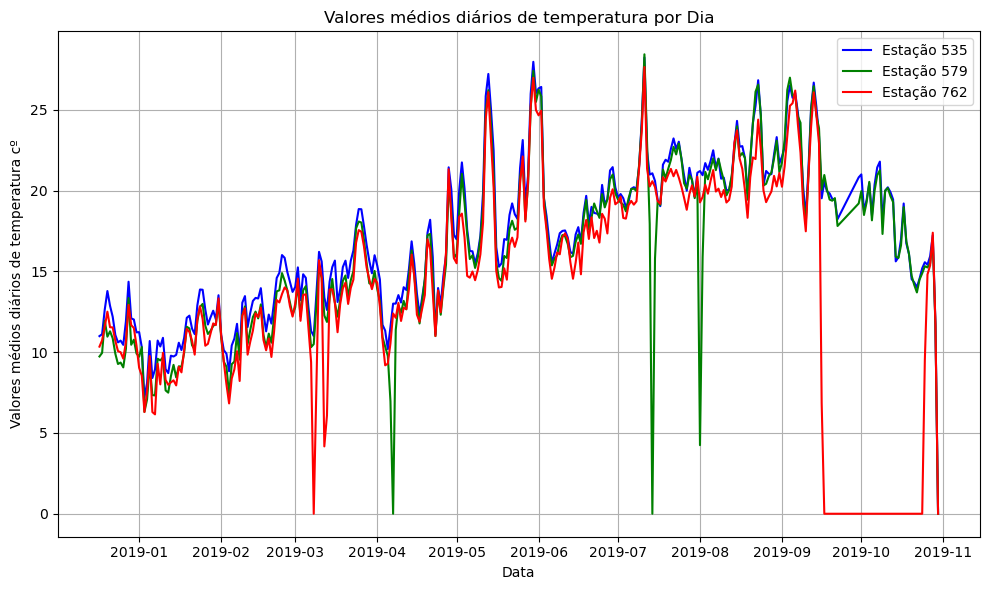

O dia com maior media de temperatura na estação 535 foi: 2019-07-11 28.246113989637305
O dia com maior media de temperatura na estação 579 foi: 2019-07-11 28.443890274314214
O dia com maior media de temperatura na estação 762 foi: 2019-07-11 27.656756756756756


In [9]:
#Pre 2020 temperature

# Mapping 'estacion'
df_estacao_535 = ipmadataset[ipmadataset['estacion'] == 535]
df_estacao_579 = ipmadataset[ipmadataset['estacion'] == 579]
df_estacao_762 = ipmadataset[ipmadataset['estacion'] == 762]

# Convert 'fecha' column to datetime type
df_estacao_535['fecha'] = pd.to_datetime(df_estacao_535['fecha'])
df_estacao_579['fecha'] = pd.to_datetime(df_estacao_579['fecha'])
df_estacao_762['fecha'] = pd.to_datetime(df_estacao_762['fecha'])

# Removal of the error value (-99.0) for each station
df_filtrado_535 = df_estacao_535[df_estacao_535['temperatura'] != -99.0]
df_filtrado_579 = df_estacao_579[df_estacao_579['temperatura'] != -99.0]
df_filtrado_762 = df_estacao_762[df_estacao_762['temperatura'] != -99.0]

# Group data by day and calculate the maximum verified
media_por_dia_535 = df_filtrado_535.groupby(df_filtrado_535['fecha'].dt.date)['temperatura'].mean()
media_por_dia_579 = df_filtrado_579.groupby(df_filtrado_579['fecha'].dt.date)['temperatura'].mean()
media_por_dia_762 = df_filtrado_762.groupby(df_filtrado_762['fecha'].dt.date)['temperatura'].mean()

# Chart
plt.figure(figsize=(10, 6))
media_por_dia_535.plot(color='blue', label='Estação 535')
media_por_dia_579.plot(color='green', label='Estação 579')
media_por_dia_762.plot(color='red', label='Estação 762')
plt.title('Valores médios diários de temperatura por Dia')
plt.xlabel('Data')
plt.ylabel('Valores médios diários de temperatura cº')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Day with the highest amount of precipitation for each station
dia_media_temperatura_535 = media_por_dia_535.idxmax()
valor_media_temperatura_535 = media_por_dia_535.max()
dia_media_temperatura_579 = media_por_dia_579.idxmax()
valor_media_temperatura_579 = media_por_dia_579.max()
dia_media_temperatura_762 = media_por_dia_762.idxmax()
valor_media_temperatura_762 = media_por_dia_762.max()

print("O dia com maior media de temperatura na estação 535 foi:", dia_media_temperatura_535,valor_media_temperatura_535)
print("O dia com maior media de temperatura na estação 579 foi:", dia_media_temperatura_579, valor_media_temperatura_579)
print("O dia com maior media de temperatura na estação 762 foi:", dia_media_temperatura_762, valor_media_temperatura_762)

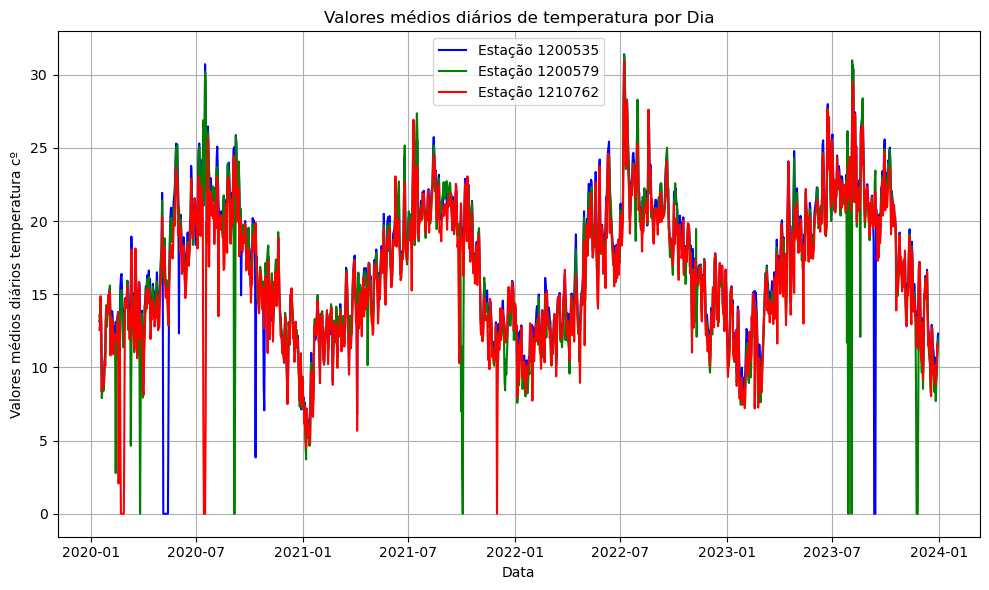

O dia com maior media de temperatura na estação 535 foi: 2022-07-08 31.396363636363635
O dia com maior media de temperatura na estação 579 foi: 2022-07-08 31.325411334552104
O dia com maior media de temperatura na estação 762 foi: 2022-07-08 30.941068139963168


In [8]:
# Post 2020 average temperature


# Mapping 'estacion'
df_estacao_535 = ipmadataset[ipmadataset['estacion'] == 1200535]
df_estacao_579 = ipmadataset[ipmadataset['estacion'] == 1200579]
df_estacao_762 = ipmadataset[ipmadataset['estacion'] == 1210762]

# Convert the 'fecha' column to datetime type
df_estacao_535['fecha'] = pd.to_datetime(df_estacao_535['fecha'])
df_estacao_579['fecha'] = pd.to_datetime(df_estacao_579['fecha'])
df_estacao_762['fecha'] = pd.to_datetime(df_estacao_762['fecha'])

# Removal of the error value (-99.0) for each station
df_filtrado_535 = df_estacao_535[df_estacao_535['temperatura'] != -99.0]
df_filtrado_579 = df_estacao_579[df_estacao_579['temperatura'] != -99.0]
df_filtrado_762 = df_estacao_762[df_estacao_762['temperatura'] != -99.0]

# Group data by day and calculate the maximum verified
media_por_dia_535 = df_filtrado_535.groupby(df_filtrado_535['fecha'].dt.date)['temperatura'].mean()
media_por_dia_579 = df_filtrado_579.groupby(df_filtrado_579['fecha'].dt.date)['temperatura'].mean()
media_por_dia_762 = df_filtrado_762.groupby(df_filtrado_762['fecha'].dt.date)['temperatura'].mean()

# Chart
plt.figure(figsize=(10, 6))
media_por_dia_535.plot(color='blue', label='Estação 1200535')
media_por_dia_579.plot(color='green', label='Estação 1200579')
media_por_dia_762.plot(color='red', label='Estação 1210762')
plt.title('Valores médios diários de temperatura por Dia')
plt.xlabel('Data')
plt.ylabel('Valores médios diários temperatura cº')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Day with the average temperature value for each season
dia_media_temperatura_1200535 = media_por_dia_535.idxmax()
valor_media_temperatura_1200535 = media_por_dia_535.max()
dia_media_temperatura_1200579 = media_por_dia_579.idxmax()
valor_media_temperatura_1200579 = media_por_dia_579.max()
dia_media_temperatura_1210762 = media_por_dia_762.idxmax()
valor_media_temperatura_1210762 = media_por_dia_762.max()

print("O dia com maior media de temperatura na estação 535 foi:", dia_media_temperatura_1200535,valor_media_temperatura_1200535)
print("O dia com maior media de temperatura na estação 579 foi:", dia_media_temperatura_1200579, valor_media_temperatura_1200579)
print("O dia com maior media de temperatura na estação 762 foi:", dia_media_temperatura_1210762, valor_media_temperatura_1210762)